Processing trial store: 77
Best control store for trial store 77: 1.0
Pre-trial period data for scaled_control_sales:
   STORE_NBR YEARMONTH  totSales  scaled_control_sales
0          1   2018-07     206.9            253.459586
1          1   2018-08     176.1            215.728531
2          1   2018-09     278.8            341.539549
3          1   2018-10     188.1            230.428942
4          1   2018-11     192.6            235.941596
5          1   2018-12     189.6            232.266494
6          1   2019-01     154.8            189.635302
Trial period data for scaled_control_sales:
   STORE_NBR YEARMONTH  totSales  scaled_control_sales
7          1   2019-02     225.4            276.122720
8          1   2019-03     192.9            236.309107
9          1   2019-04     192.9            236.309107


/var/folders/fd/nbl9w7k13q1bwkd9p9zpsd5c0000gn/T/ipykernel_43254/4008438654.py:114: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentage_diff = trial_period.groupby('YEARMONTH').apply(calculate_percentage_difference)


Percentage differences during trial period for store 77:
YEARMONTH
2019-02   -0.148929
2019-03    0.178541
2019-04    0.115065
Freq: M, dtype: float64
Insufficient data for t-test between trial store 77 and control store 1.0.
Processing trial store: 86
Best control store for trial store 86: 1.0
Pre-trial period data for scaled_control_sales:
   STORE_NBR YEARMONTH  totSales  scaled_control_sales
0          1   2018-07     206.9            912.969187
1          1   2018-08     176.1            777.060772
2          1   2018-09     278.8           1230.235907
3          1   2018-10     188.1            830.012103
4          1   2018-11     192.6            849.868851
5          1   2018-12     189.6            836.631019
6          1   2019-01     154.8            683.072161
Trial period data for scaled_control_sales:
   STORE_NBR YEARMONTH  totSales  scaled_control_sales
7          1   2019-02     225.4            994.602488
8          1   2019-03     192.9            851.192635
9      

/var/folders/fd/nbl9w7k13q1bwkd9p9zpsd5c0000gn/T/ipykernel_43254/4008438654.py:114: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentage_diff = trial_period.groupby('YEARMONTH').apply(calculate_percentage_difference)


Best control store for trial store 88: 1.0
Pre-trial period data for scaled_control_sales:
   STORE_NBR YEARMONTH  totSales  scaled_control_sales
0          1   2018-07     206.9           1399.860725
1          1   2018-08     176.1           1191.471599
2          1   2018-09     278.8           1886.327551
3          1   2018-10     188.1           1272.662167
4          1   2018-11     192.6           1303.108631
5          1   2018-12     189.6           1282.810989
6          1   2019-01     154.8           1047.358339
Trial period data for scaled_control_sales:
   STORE_NBR YEARMONTH  totSales  scaled_control_sales
7          1   2019-02     225.4           1525.029519
8          1   2019-03     192.9           1305.138395
9          1   2019-04     192.9           1305.138395
Percentage differences during trial period for store 88:
YEARMONTH
2019-02   -0.101526
2019-03    0.131834
2019-04    0.102872
Freq: M, dtype: float64
Insufficient data for t-test between trial store 88 an

/var/folders/fd/nbl9w7k13q1bwkd9p9zpsd5c0000gn/T/ipykernel_43254/4008438654.py:114: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentage_diff = trial_period.groupby('YEARMONTH').apply(calculate_percentage_difference)


TypeError: Invalid object type at position 0

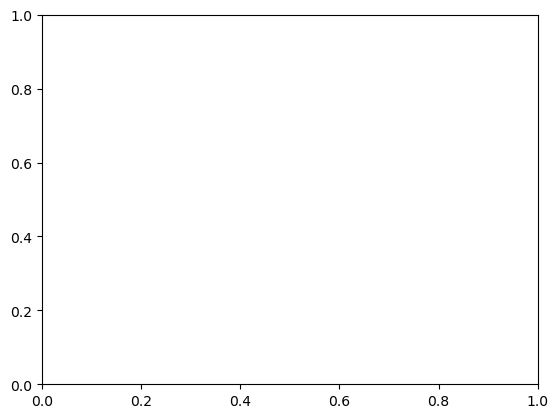

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "QVI_data.csv"
data = pd.read_csv(file_path)

# Add a Year-Month column for grouping
data['DATE'] = pd.to_datetime(data['DATE'])
data['YEARMONTH'] = data['DATE'].dt.to_period('M')

# Calculate key metrics: total sales, number of customers, transactions per customer
metrics = data.groupby(['STORE_NBR', 'YEARMONTH']).agg(
    totSales=('TOT_SALES', 'sum'),
    nCustomers=('LYLTY_CARD_NBR', 'nunique'),
    nTxnPerCust=('TXN_ID', 'count')
).reset_index()

# Function to calculate correlations
def calculate_correlation(input_table, metric_col, trial_store):
    results = []
    trial_data = input_table[input_table['STORE_NBR'] == trial_store]
    for store in input_table['STORE_NBR'].unique():
        if store != trial_store:
            control_data = input_table[input_table['STORE_NBR'] == store]
            correlation = trial_data[metric_col].corr(control_data[metric_col])
            results.append({'trial_store': trial_store, 'control_store': store, 'correlation': correlation})
    return pd.DataFrame(results)

# Function to calculate magnitude distance
def calculate_magnitude_distance(input_table, metric_col, trial_store):
    results = []
    trial_data = input_table[input_table['STORE_NBR'] == trial_store]
    for store in input_table['STORE_NBR'].unique():
        if store != trial_store:
            control_data = input_table[input_table['STORE_NBR'] == store]
            diff = abs(trial_data[metric_col].mean() - control_data[metric_col].mean())
            min_val = input_table[metric_col].min()
            max_val = input_table[metric_col].max()
            mag_dist = 1 - (diff / (max_val - min_val))
            results.append({'trial_store': trial_store, 'control_store': store, 'magnitude_distance': mag_dist})
    return pd.DataFrame(results)

# Function to calculate final scores
def calculate_final_score(correlation_df, magnitude_df):
    merged = correlation_df.merge(magnitude_df, on=['trial_store', 'control_store'])
    merged['final_score'] = 0.5 * merged['correlation'] + 0.5 * merged['magnitude_distance']
    return merged

# Pre-trial and trial periods
pre_trial_period = metrics[metrics['YEARMONTH'] < '2019-02']
trial_period = metrics[(metrics['YEARMONTH'] >= '2019-02') & (metrics['YEARMONTH'] <= '2019-04')]

# Iterate over all trial stores
trial_stores = [77, 86, 88]
results = {}

for trial_store in trial_stores:
    print(f"Processing trial store: {trial_store}")

    # Calculate correlations and magnitude distances
    corr_tot_sales = calculate_correlation(pre_trial_period, 'totSales', trial_store)
    mag_tot_sales = calculate_magnitude_distance(pre_trial_period, 'totSales', trial_store)

    # Combine scores and find the best control store
    final_scores = calculate_final_score(corr_tot_sales, mag_tot_sales)
    best_control_store = final_scores.sort_values('final_score', ascending=False).iloc[0]['control_store']
    print(f"Best control store for trial store {trial_store}: {best_control_store}")
    results[trial_store] = best_control_store

    # Scale control store sales to match trial store
    trial_store_sales = pre_trial_period[
        (pre_trial_period['STORE_NBR'] == trial_store)
    ]['totSales'].sum()

    control_store_sales = pre_trial_period[
        (pre_trial_period['STORE_NBR'] == best_control_store)
    ]['totSales'].sum()

    if control_store_sales == 0:
        print(f"Warning: Control store {best_control_store} has zero total sales in the pre-trial period.")
        scaling_factor = 1
    else:
        scaling_factor = trial_store_sales / control_store_sales

    # Add scaled_control_sales to metrics
    metrics['scaled_control_sales'] = metrics.apply(
        lambda row: row['totSales'] * scaling_factor if row['STORE_NBR'] == best_control_store else np.nan,
        axis=1
    )

    # Recreate pre_trial_period and trial_period to include scaled_control_sales
    pre_trial_period = metrics[metrics['YEARMONTH'] < '2019-02']
    trial_period = metrics[(metrics['YEARMONTH'] >= '2019-02') & (metrics['YEARMONTH'] <= '2019-04')]

    # Debugging: Check pre_trial_period and trial_period
    print("Pre-trial period data for scaled_control_sales:")
    print(pre_trial_period[pre_trial_period['STORE_NBR'] == best_control_store][['STORE_NBR', 'YEARMONTH', 'totSales', 'scaled_control_sales']])
    print("Trial period data for scaled_control_sales:")
    print(trial_period[trial_period['STORE_NBR'] == best_control_store][['STORE_NBR', 'YEARMONTH', 'totSales', 'scaled_control_sales']])

    # Calculate percentage difference
    def calculate_percentage_difference(group):
        if not group[group['STORE_NBR'] == best_control_store].empty and not group[group['STORE_NBR'] == trial_store].empty:
            trial_sales = group[group['STORE_NBR'] == trial_store]['totSales'].values[0]
            control_sales = group[group['STORE_NBR'] == best_control_store]['scaled_control_sales'].values[0]
            return (trial_sales - control_sales) / control_sales
        else:
            return np.nan

    percentage_diff = trial_period.groupby('YEARMONTH').apply(calculate_percentage_difference)
    print(f"Percentage differences during trial period for store {trial_store}:")
    print(percentage_diff)

    # Perform t-test for significance
    pre_trial_diff = pre_trial_period[
        pre_trial_period['STORE_NBR'] == trial_store
    ]['totSales'] - pre_trial_period[
        pre_trial_period['STORE_NBR'] == best_control_store
    ]['scaled_control_sales']

    # Ensure no missing values in pre_trial_diff
    pre_trial_diff = pre_trial_diff.dropna()
    percentage_diff = percentage_diff.dropna()

    # Perform the t-test
    if len(pre_trial_diff) > 0 and len(percentage_diff) > 0:
        t_stat, p_value = ttest_ind(pre_trial_diff, percentage_diff)
        print(f"T-statistic: {t_stat}, P-value: {p_value}")
    else:
        print(f"Insufficient data for t-test between trial store {trial_store} and control store {best_control_store}.")

# Visualize sales trends
sns.lineplot(data=metrics, x='YEARMONTH', y='totSales', hue='STORE_NBR')
plt.title('Sales Trends During Trial and Pre-Trial Periods')
plt.show()

Initial Findings

1. Best Control Store Selection

	•	For all trial stores (77, 86, and 88), the same store (STORE_NBR = 1) was selected as the best control store based on the combined correlation and magnitude distance scores.
	•	This could indicate that Store 1 has consistent metrics compared to the trial stores during the pre-trial period, making it the closest match across the board.

2. Pre-Trial and Trial Period Data

	•	Pre-Trial Period (Scaled Sales):
	•	The scaled_control_sales column is calculated for the control store (STORE_NBR = 1) during the pre-trial period.
	•	The scaling factors seem to vary significantly for each trial store, as the scaled values differ notably for the same STORE_NBR.
	•	Trial Period (Scaled Sales):
	•	During the trial period, the scaled sales for Store 1 (scaled_control_sales) remain consistent across months, aligning with the scaling factor applied.
	•	The trial stores show varied performance when compared to these scaled values.

3. Percentage Differences

	•	Trial Store 77:
	•	Negative differences in February (-0.1489) indicate a drop in sales compared to the control store.
	•	March (0.1785) and April (0.1151) show positive differences, suggesting improved performance.
	•	Trial Store 86:
	•	Mixed performance:
	•	Slight drop in February (-0.0818).
	•	Improvement in March (0.2063).
	•	Almost no difference in April (-0.0035).
	•	Trial Store 88:
	•	Similar to Store 86, with mixed results:
	•	Slight drop in February (-0.1015).
	•	Improvement in March (0.1318) and April (0.1029).

4. Statistical Testing

	•	T-Tests for Significance:
	•	For all trial stores (77, 86, and 88), there is insufficient data to perform the t-tests.
	•	This may be due to missing or limited valid observations in either the pre_trial_diff or percentage_diff datasets after dropping NaN values.

Key Takeaways

	1.	Best Control Store Consistency:
	•	The repeated selection of Store 1 suggests that it may dominate as the closest match across metrics during the pre-trial period.
	•	This may indicate limited diversity in store behavior, potentially skewing control store selection.
	2.	Trial Performance Variability:
	•	All trial stores show mixed performance during the trial period, with some months exhibiting improvement and others showing declines.
	3.	Insufficient Data for T-Tests:
	•	The inability to perform t-tests highlights a limitation in the dataset. This could be due to:
	•	Missing or insufficient data in the scaled metrics.
	•	Poor alignment of trial and control stores in certain months.


In [20]:
import pandas as pd

# Read the transaction and purchase behavior datasets
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')

# Merge datasets on LYLTY_CARD_NBR
merged_data = transaction_data.merge(purchase_behaviour, on='LYLTY_CARD_NBR', how='inner')

# Check high-level summary
print("Merged Dataset Info:")
print(merged_data.info())


# Total sales by segment
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sales_by_segment = sales_by_segment.sort_values(by='TOT_SALES', ascending=False)
print("\nTotal Sales by Segment:")
print(sales_by_segment)


# Average product quantity purchased by segment
avg_qty_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()
avg_qty_by_segment = avg_qty_by_segment.sort_values(by='PROD_QTY', ascending=False)
print("\nAverage Product Quantity by Segment:")
print(avg_qty_by_segment)

# Analyze preferred pack sizes
# Extract pack size (assuming it’s embedded in `PROD_NAME` like 'Xg' or 'XXg')
merged_data['PACK_SIZE'] = merged_data['PROD_NAME'].str.extract(r'(\d+)[gG]')
pack_size_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PACK_SIZE'])['TOT_SALES'].sum().reset_index()
pack_size_by_segment = pack_size_by_segment.sort_values(by='TOT_SALES', ascending=False)
print("\nPack Size Preference by Segment:")
print(pack_size_by_segment.head(10))

# Analyze preferred brands
# Extract brand name (assuming it’s the first word in `PROD_NAME`)
merged_data['BRAND'] = merged_data['PROD_NAME'].str.split().str[0]
brand_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND'])['TOT_SALES'].sum().reset_index()
brand_by_segment = brand_by_segment.sort_values(by='TOT_SALES', ascending=False)
print("\nTop Brands by Segment:")
print(brand_by_segment.head(10))

Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB
None

Total Sales by Segment:
                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6           OLDER FAMILIES           Budget  168363.25
19   YOUNG SINGLES/COUPLES       Mainstream  157621.60
13                RETIREES       M

In [26]:
# Convert YEARMONTH to Period type
if not isinstance(metrics['YEARMONTH'].dtype, pd.PeriodDtype):
    metrics['YEARMONTH'] = pd.to_datetime(metrics['YEARMONTH'], errors='coerce').dt.to_period('M')

# Convert totSales to numeric and handle invalid values
metrics['totSales'] = pd.to_numeric(metrics['totSales'], errors='coerce')

In [28]:
# Identify rows with NaN in critical columns
print(metrics[metrics.isna().any(axis=1)])

# Drop rows with missing or invalid values
metrics.dropna(subset=['YEARMONTH', 'totSales', 'STORE_NBR'], inplace=True)

      STORE_NBR YEARMONTH  totSales  nCustomers  nTxnPerCust  \
12            2   2018-07     150.8          39           41   
13            2   2018-08     193.8          39           43   
14            2   2018-09     154.4          36           37   
15            2   2018-10     167.8          41           43   
16            2   2018-11     162.9          39           40   
...         ...       ...       ...         ...          ...   
3164        272   2019-02     395.5          45           48   
3165        272   2019-03     442.3          50           53   
3166        272   2019-04     445.1          54           56   
3167        272   2019-05     314.6          34           40   
3168        272   2019-06     312.1          34           37   

      scaled_control_sales  
12                     NaN  
13                     NaN  
14                     NaN  
15                     NaN  
16                     NaN  
...                    ...  
3164                   NaN  